In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from textblob import TextBlob
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px


In [ ]:
df = pd.read_excel("/content/hotel_reviews (2).xlsx")

In [ ]:
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB
None


In [ ]:
print("\nFirst few rows of the dataset:")
print(df.head())



First few rows of the dataset:
                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5


In [ ]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())



Missing values in the dataset:
Review    0
Rating    0
dtype: int64


In [ ]:
# Summary statistics of numerical columns
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
             Rating
count  20491.000000
mean       3.952223
std        1.233030
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000


In [ ]:
# Preprocessing

In [ ]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Function to apply advanced text preprocessing with lemmatization
def preprocess_text_lemmatize(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization and lemmatization
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply advanced text preprocessing with lemmatization to the 'Review' column
df['Review'] = df['Review'].apply(preprocess_text_lemmatize)

# Display the updated 'Review' column
print("\nUpdated 'Review' column after advanced text preprocessing with lemmatization:")
print(df['Review'].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Updated 'Review' column after advanced text preprocessing with lemmatization:
0    nice hotel expensive parking got good deal sta...
1    ok nothing special charge diamond member hilto...
2    nice room experience hotel monaco seattle good...
3    unique great stay wonderful time hotel monaco ...
4    great stay great stay went seahawk game awesom...
Name: Review, dtype: object


In [ ]:
# Function to calculate sentiment subjectivity
def calculate_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Function to calculate sentiment polarity
def calculate_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply advanced text preprocessing with lemmatization to the 'Review' column
df['Review'] = df['Review'].apply(preprocess_text_lemmatize)

# Add 'Word_Length' feature
df['Word_Length'] = df['Review'].apply(lambda x: len(x.split()))

# Calculate sentiment subjectivity and polarity
df['Subjectivity'] = df['Review'].apply(calculate_subjectivity)
df['Polarity'] = df['Review'].apply(calculate_polarity)

# Create a new column for sentiment labels based on ratings
def label_sentiment(rating):
    if rating in [1, 2]:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    elif rating in [4, 5]:
        return 'Positive'

df['Sentiment_Label'] = df['Rating'].apply(label_sentiment)

# Display the updated DataFrame
print("\nUpdated DataFrame with new features and sentiment labels:")
print(df.head())



Updated DataFrame with new features and sentiment labels:
                                              Review  Rating  Word_Length  \
0  nice hotel expensive parking got good deal sta...       4           80   
1  ok nothing special charge diamond member hilto...       2          230   
2  nice room experience hotel monaco seattle good...       3          199   
3  unique great stay wonderful time hotel monaco ...       5           85   
4  great stay great stay went seahawk game awesom...       5          177   

   Subjectivity  Polarity Sentiment_Label  
0      0.687000  0.208744        Positive  
1      0.523295  0.248633        Negative  
2      0.605208  0.294420         Neutral  
3      0.691228  0.504825        Positive  
4      0.627296  0.469643        Positive  


In [ ]:
# EDA

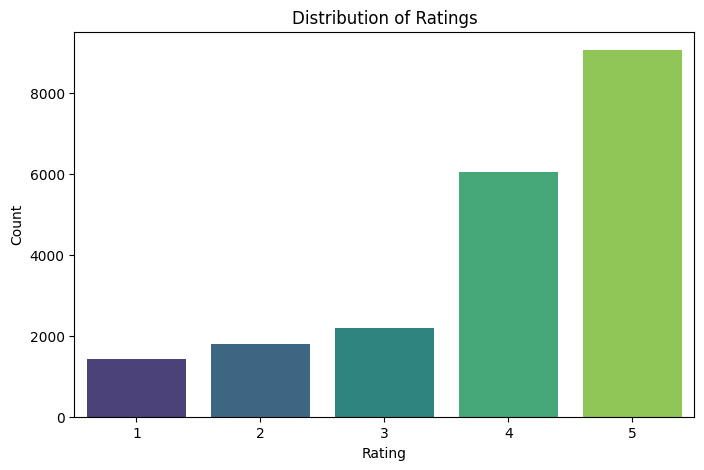

In [ ]:
# Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

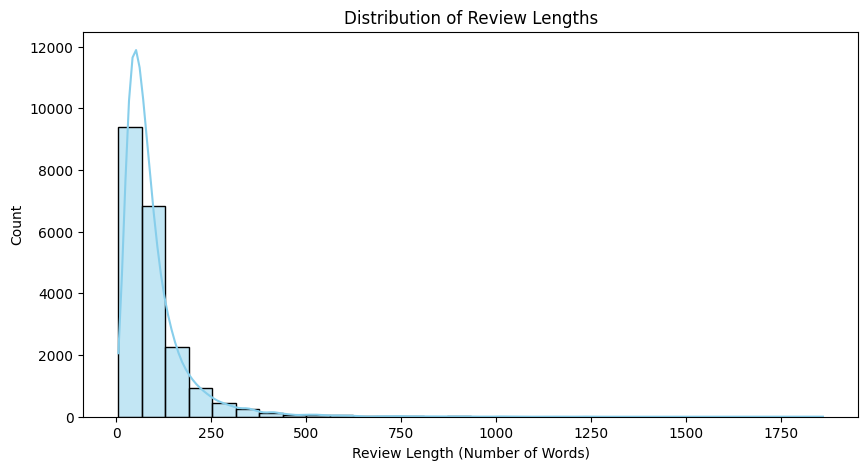

In [ ]:
# Distribution of Review Lengths
plt.figure(figsize=(10, 5))
sns.histplot(df['Word_Length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Count')
plt.show()

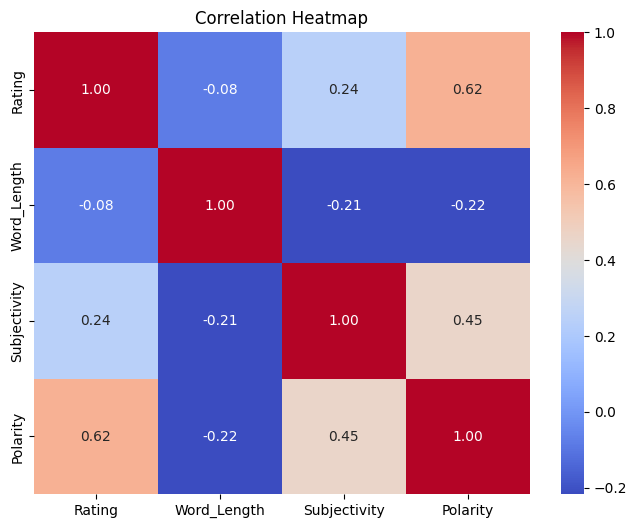

In [ ]:
# Correlation Heatmap
correlation_matrix = df[['Rating', 'Word_Length', 'Subjectivity', 'Polarity']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

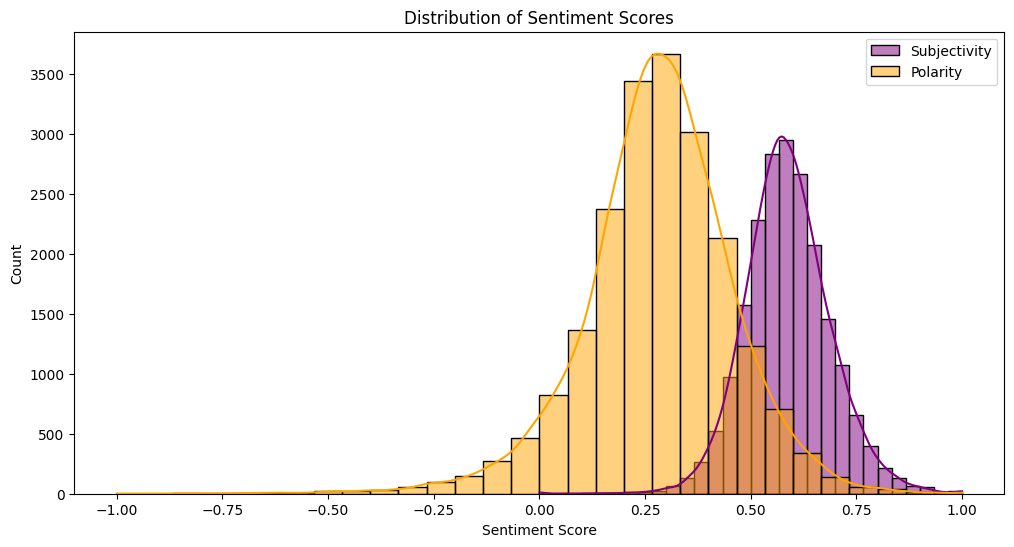

In [ ]:
# Distribution of Sentiment Scores
plt.figure(figsize=(12, 6))
sns.histplot(df['Subjectivity'], bins=30, kde=True, color='purple', label='Subjectivity')
sns.histplot(df['Polarity'], bins=30, kde=True, color='orange', label='Polarity')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.legend()
plt.show()

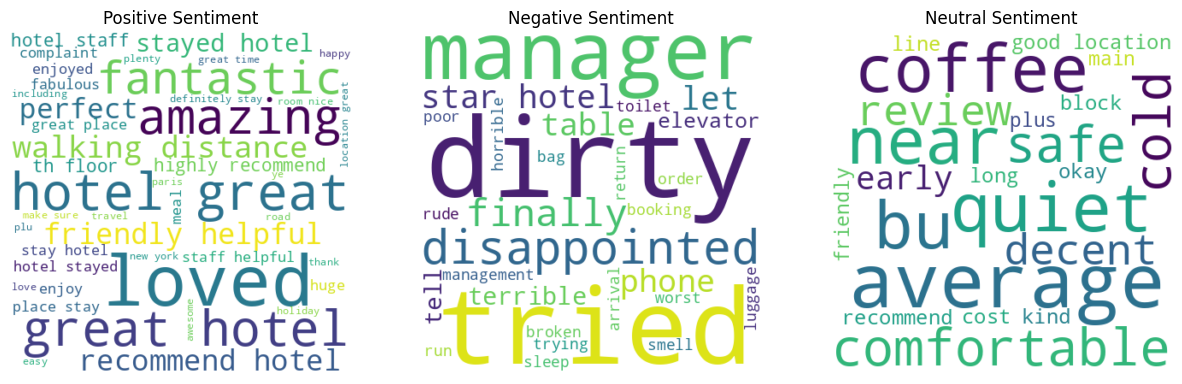

In [ ]:
# Combine all reviews for each sentiment
positive_reviews = ' '.join(df[df['Sentiment_Label'] == 'Positive']['Review'])
negative_reviews = ' '.join(df[df['Sentiment_Label'] == 'Negative']['Review'])
neutral_reviews = ' '.join(df[df['Sentiment_Label'] == 'Neutral']['Review'])

# Define common stopwords
common_stopwords = set(STOPWORDS)

# Create WordCloud for Positive Sentiment
wordcloud_positive = WordCloud(stopwords=common_stopwords, background_color='white').generate(positive_reviews)

# Create WordCloud for Negative Sentiment
wordcloud_negative = WordCloud(stopwords=common_stopwords, background_color='white').generate(negative_reviews)

# Create WordCloud for Neutral Sentiment
wordcloud_neutral = WordCloud(stopwords=common_stopwords, background_color='white').generate(neutral_reviews)

# Remove words common across all three sentiments
unique_positive_words = set(wordcloud_positive.words_) - set(wordcloud_negative.words_) - set(wordcloud_neutral.words_)
unique_negative_words = set(wordcloud_negative.words_) - set(wordcloud_positive.words_) - set(wordcloud_neutral.words_)
unique_neutral_words = set(wordcloud_neutral.words_) - set(wordcloud_positive.words_) - set(wordcloud_negative.words_)

# Create WordClouds with unique words
wordcloud_positive = WordCloud(stopwords=common_stopwords, background_color='white', width=400, height=400).generate_from_frequencies({word: wordcloud_positive.words_[word] for word in unique_positive_words})

wordcloud_negative = WordCloud(stopwords=common_stopwords, background_color='white', width=400, height=400).generate_from_frequencies({word: wordcloud_negative.words_[word] for word in unique_negative_words})

wordcloud_neutral = WordCloud(stopwords=common_stopwords, background_color='white', width=400, height=400).generate_from_frequencies({word: wordcloud_neutral.words_[word] for word in unique_neutral_words})

# Plot the WordClouds
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis('off')

plt.show()

In [ ]:
# Function to get the top N-grams
def get_top_ngrams(sentiment, n=2, top_n=10):
    reviews = df[df['Sentiment_Label'] == sentiment]['Review']
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform(reviews)
    ngrams_sum = ngrams.sum(axis=0)
    ngrams_freq = [(word, ngrams_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    top_ngrams = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:top_n]
    return top_ngrams

# Get top bi-grams for each sentiment
top_positive_bigrams = get_top_ngrams('Positive', n=2)
top_negative_bigrams = get_top_ngrams('Negative', n=2)
top_neutral_bigrams = get_top_ngrams('Neutral', n=2)

# Print or visualize the top bi-grams
print('Top Positive Bi-grams:', top_positive_bigrams)
print('Top Negative Bi-grams:', top_negative_bigrams)
print('Top Neutral Bi-grams:', top_neutral_bigrams)


Top Positive Bi-grams: [('great location', 1773), ('staff friendly', 1694), ('ca nt', 1412), ('great hotel', 1387), ('minute walk', 1361), ('room clean', 1339), ('hotel great', 1282), ('walking distance', 1225), ('friendly helpful', 1205), ('recommend hotel', 1176)]
Top Negative Bi-grams: [('punta cana', 350), ('star hotel', 299), ('room service', 235), ('hotel room', 234), ('stay hotel', 205), ('room small', 205), ('ca nt', 204), ('air conditioning', 190), ('credit card', 186), ('stayed hotel', 178)]
Top Neutral Bi-grams: [('great location', 250), ('staff friendly', 235), ('room clean', 222), ('punta cana', 201), ('ca nt', 193), ('room small', 176), ('good location', 168), ('minute walk', 166), ('stayed night', 165), ('hotel room', 148)]


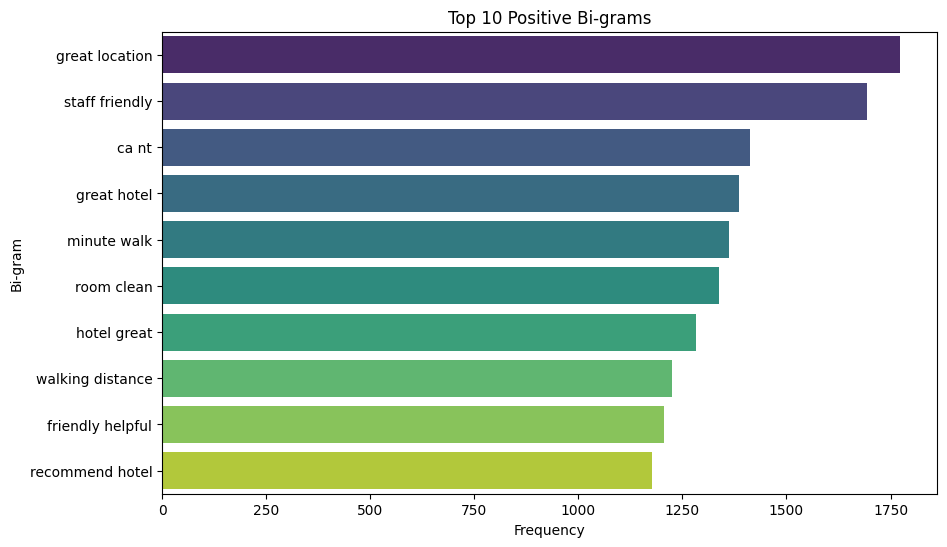

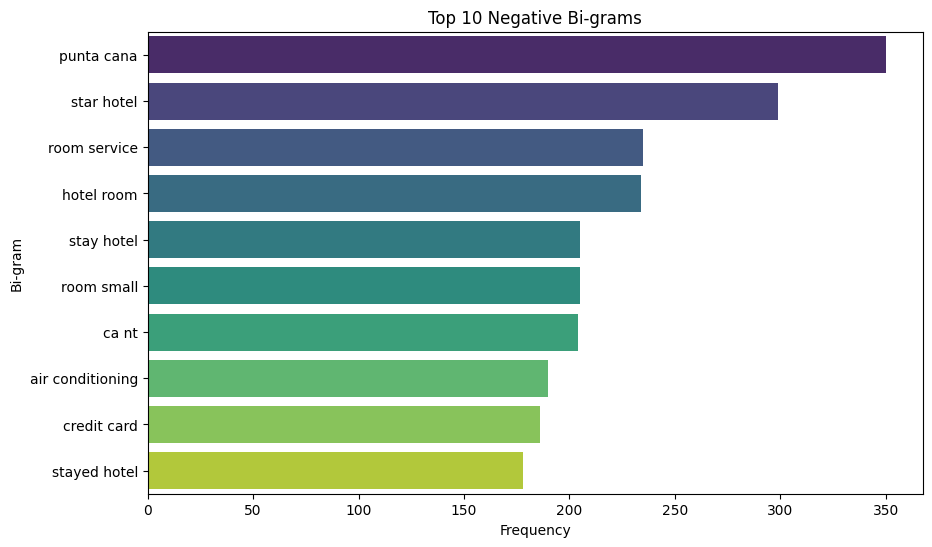

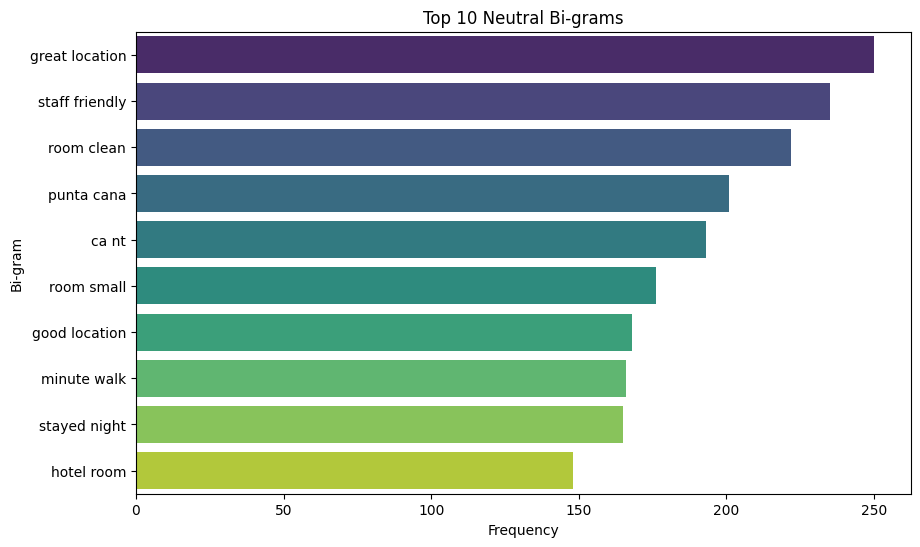

In [ ]:
# Function to visualize top N-grams
def visualize_top_ngrams(top_ngrams, sentiment):
    words, frequencies = zip(*top_ngrams)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(frequencies), y=list(words), palette='viridis')
    plt.title(f'Top {len(top_ngrams)} {sentiment} Bi-grams')
    plt.xlabel('Frequency')
    plt.ylabel('Bi-gram')
    plt.show()

# Visualize top bi-grams for each sentiment
visualize_top_ngrams(top_positive_bigrams, 'Positive')
visualize_top_ngrams(top_negative_bigrams, 'Negative')
visualize_top_ngrams(top_neutral_bigrams, 'Neutral')



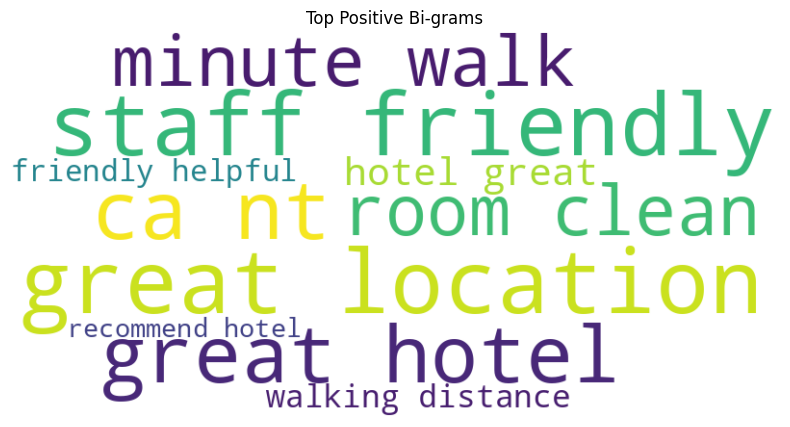

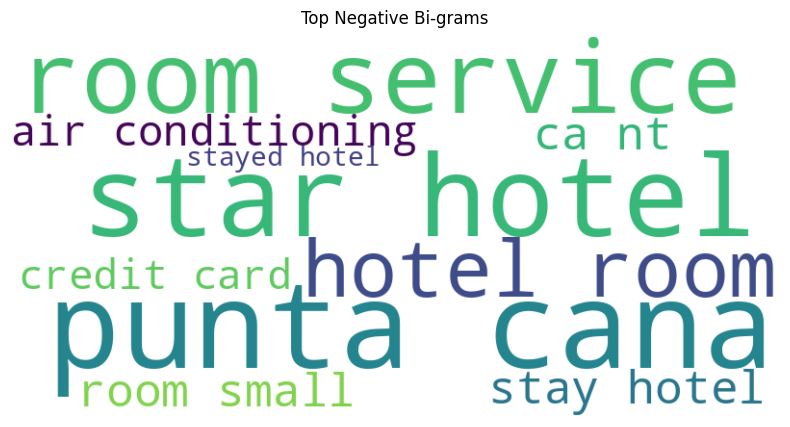

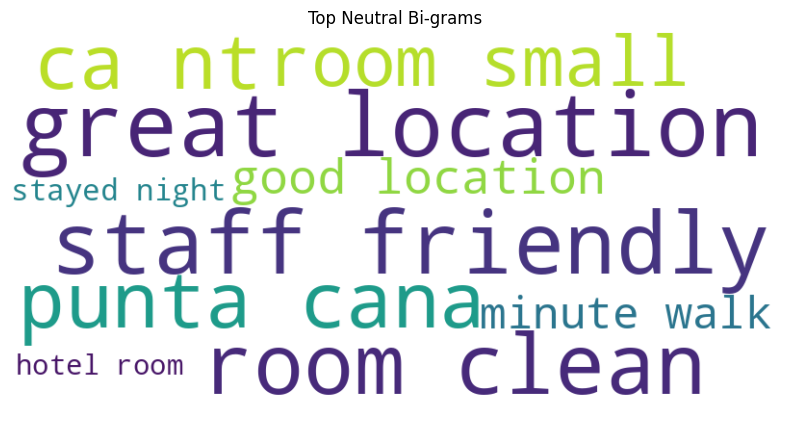

In [ ]:
# Function to generate word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for top bi-grams
generate_word_cloud(dict(top_positive_bigrams), 'Top Positive Bi-grams')
generate_word_cloud(dict(top_negative_bigrams), 'Top Negative Bi-grams')
generate_word_cloud(dict(top_neutral_bigrams), 'Top Neutral Bi-grams')


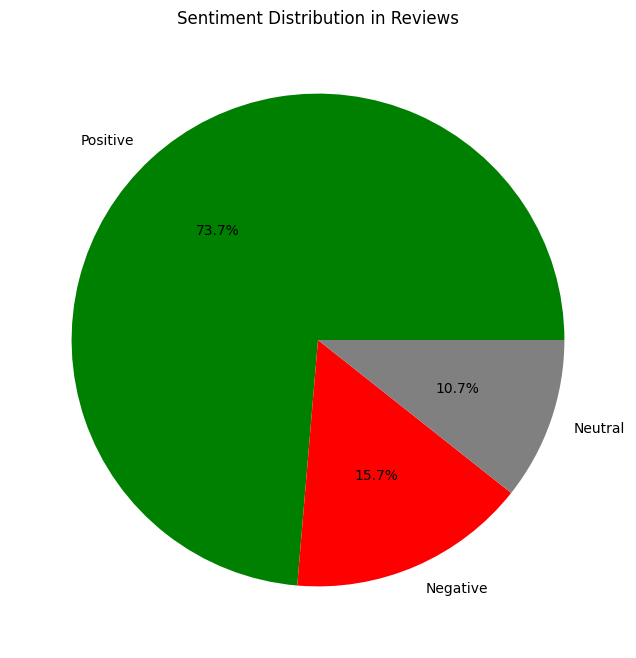

In [ ]:
# Pie chart for sentiment distribution
sentiment_distribution = df['Sentiment_Label'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', colors=['green', 'red', 'gray'])
plt.title('Sentiment Distribution in Reviews')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has be

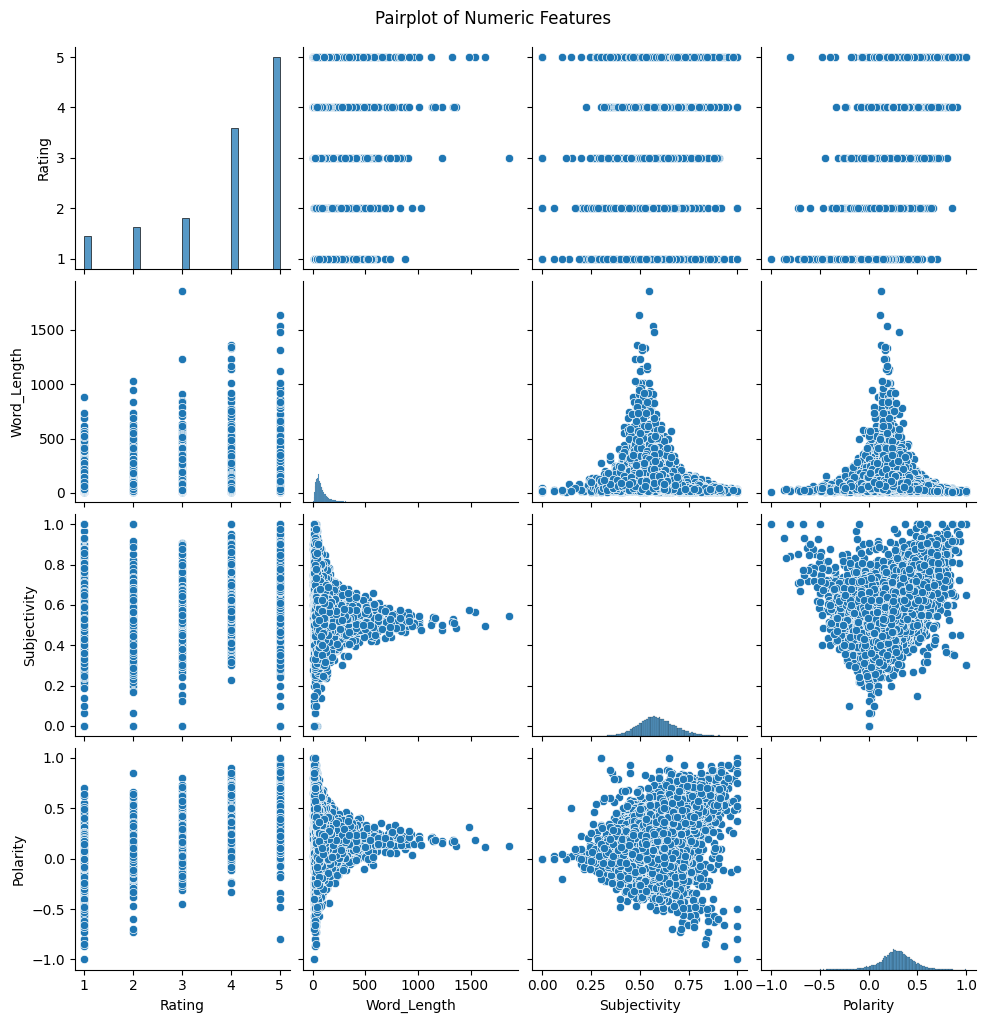

In [ ]:
# Pairplot for numeric features
numeric_features = ['Rating', 'Word_Length', 'Subjectivity', 'Polarity']
sns.pairplot(df[numeric_features], palette='viridis')
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()



In [ ]:
# Create a DataFrame for sunburst chart
sunburst_data = df.groupby(['Rating', 'Sentiment_Label']).size().reset_index(name='Count')

# Create sunburst chart
fig = px.sunburst(sunburst_data, path=['Rating', 'Sentiment_Label'], values='Count', color='Count',
                  color_continuous_scale='viridis', title='Sunburst Chart for Sentiment Breakdown')
fig.update_layout(width=800, height=600)
fig.show()


In [ ]:
# 1. Sentiment Analysis
from textblob import TextBlob

# Function to categorize sentiment labels
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis
df['Polarity'] = df['Review'].apply(calculate_polarity)
df['Sentiment_Label'] = df['Polarity'].apply(categorize_sentiment)

# 2. Keyword Extraction
family_keywords = ['family', 'kids', 'children', 'parents', 'together']
business_keywords = ['business', 'work', 'conference', 'meeting']
singles_keywords = ['solo', 'single', 'alone', 'individual']

# Function to categorize booking purpose based on keywords
def categorize_booking_purpose(text):
    text = text.lower()
    if any(keyword in text for keyword in family_keywords):
        return 'Family'
    elif any(keyword in text for keyword in business_keywords):
        return 'Business'
    elif any(keyword in text for keyword in singles_keywords):
        return 'Singles'
    else:
        return 'Other'

# Apply keyword-based categorization
df['Booking_Purpose'] = df['Review'].apply(categorize_booking_purpose)

# 3. Topic Modeling (LDA)
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Function to perform topic modeling
def perform_topic_modeling(corpus, n_topics=5):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(corpus)

    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)

    return lda, vectorizer

# Fit the topic model
lda_model, vectorizer = perform_topic_modeling(df['Review'], n_topics=5)


# Print the results
print("Sentiment Distribution:")
print(df['Sentiment_Label'].value_counts())

print("\nBooking Purpose Distribution:")
print(df['Booking_Purpose'].value_counts())

print("\nTopics from Topic Modeling:")
display_topics(lda_model, vectorizer.get_feature_names_out(), n_words=5)


Sentiment Distribution:
Positive    19328
Negative     1138
Neutral        25
Name: Sentiment_Label, dtype: int64

Booking Purpose Distribution:
Other       13782
Business     4167
Family       1992
Singles       550
Name: Booking_Purpose, dtype: int64

Topics from Topic Modeling:
Topic #1:
bali villa ubud room nusa


Topic #2:
ilikai hostel canoe vieques kahala


Topic #3:
room hotel nt night stay


Topic #4:
hotel room great location stay


Topic #5:
beach resort nt food room




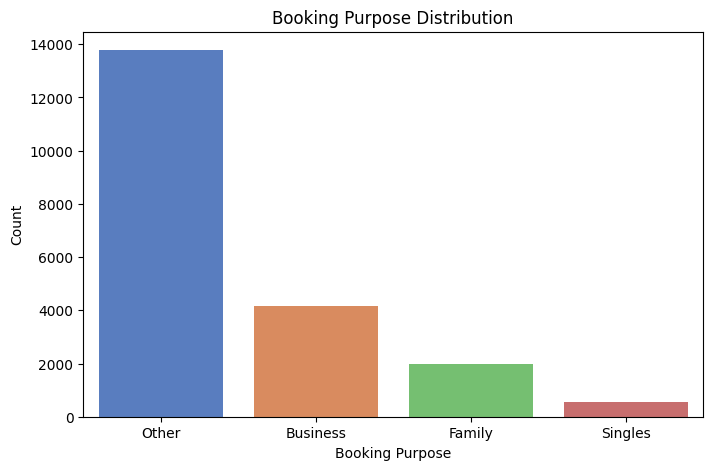

In [ ]:
# Visualize booking purpose distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Booking_Purpose', data=df, palette='muted')
plt.title('Booking Purpose Distribution')
plt.xlabel('Booking Purpose')
plt.ylabel('Count')
plt.show()


----------------------------------------------------------------------------------------------------------------------------------------------------

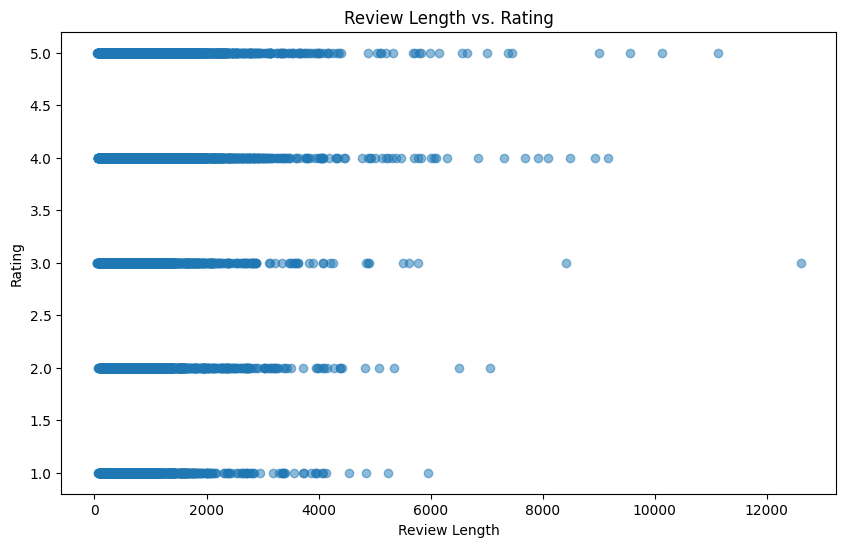

In [ ]:
df['Review_Length'] = df['Review'].apply(len)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Review_Length'], df['Rating'], alpha=0.5)
plt.title('Review Length vs. Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.show()

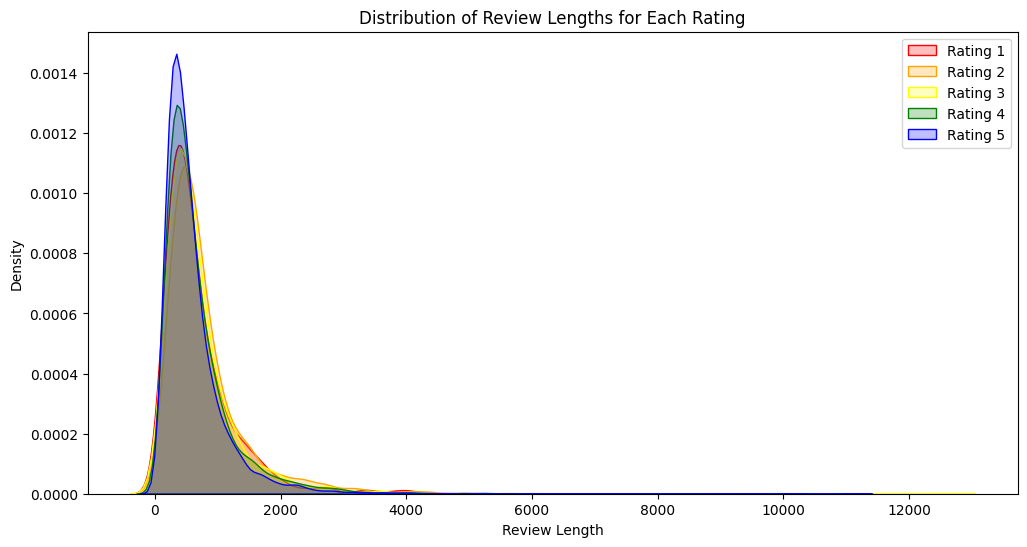

In [ ]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Create a kernel density plot for each rating with distinct colors
sns.kdeplot(df[df['Rating'] == 1]['Review_Length'], label='Rating 1', fill=True, color='red')
sns.kdeplot(df[df['Rating'] == 2]['Review_Length'], label='Rating 2', fill=True, color='orange')
sns.kdeplot(df[df['Rating'] == 3]['Review_Length'], label='Rating 3', fill=True, color='yellow')
sns.kdeplot(df[df['Rating'] == 4]['Review_Length'], label='Rating 4', fill=True, color='green')
sns.kdeplot(df[df['Rating'] == 5]['Review_Length'], label='Rating 5', fill=True, color='blue')

# Add labels and title
plt.title('Distribution of Review Lengths for Each Rating')
plt.xlabel('Review Length')
plt.ylabel('Density')

# Show legend
plt.legend()

# Show the plot
plt.show()


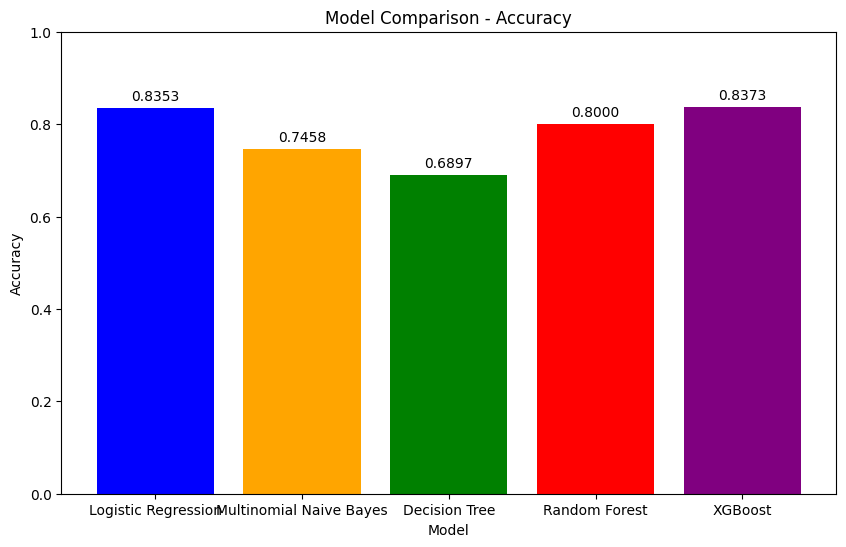

In [ ]:
# Model names and corresponding accuracies
models = ['Logistic Regression', 'Multinomial Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [0.8353, 0.7458, 0.6897, 0.8000, 0.8373]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.ylim(0, 1)  # Set y-axis limit to represent accuracy percentages

# Adding labels and title
plt.title('Model Comparison - Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Display the accuracy values on each bar
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.4f}', ha='center', va='bottom')

# Show the plot
plt.show()
